In [ ]:
import pandas as pd
from sklearn import metrics
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


df = pd.read_csv("Car_Purchasing.csv")

df_num = df._get_numeric_data()
df_num.columns.str.strip().to_list()

x = df_num.iloc[:,:-1].values
y = df_num.iloc[:,-1].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
accuracy = 100 - mape

print("mse: ",round(mse,2))
print("r2: ",round(r2,2))
print("rmse: ",round(rmse,2))
print("Accuracy: ",accuracy)

mse:  59685.04
r2:  1.0
rmse:  244.31
Accuracy:  99.49673474308517


Could not save font_manager cache Lock error: Matplotlib failed to acquire the following lock file:
    C:\Users\Vinit Pansuriya\.matplotlib\fontlist-v390.json.matplotlib-lock
This maybe due to another process holding this lock file.  If you are sure no
other Matplotlib process is running, remove this file and try again.


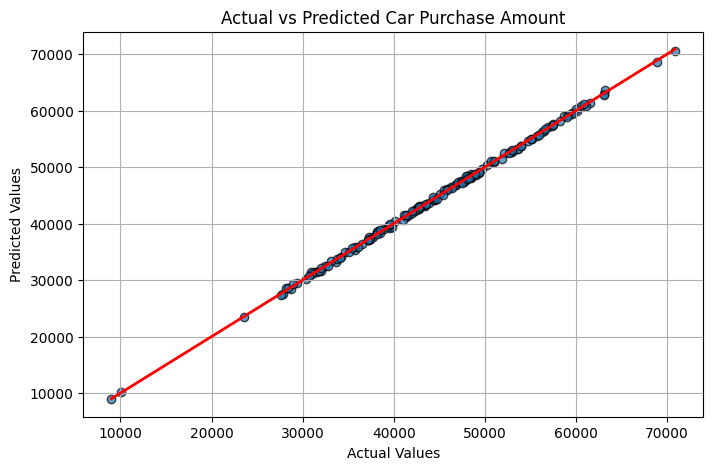

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, edgecolors='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Car Purchase Amount")
plt.grid(True)
plt.show()


In [ ]:
feature_names = df_num.columns[:-1].to_list()

print("Please enter the following values to predict Car Purchase Amount:")

user_input = []
for feature in feature_names:
    value = float(input(f"{feature}: "))
    user_input.append(value)

user_array = np.array(user_input).reshape(1, -1)
prediction = model.predict(user_array)

print(f"\n Predicted Car Purchase Amount: ₹{prediction[0]:,.2f}")